<a href="https://www.kaggle.com/code/tridibraj/brain-tumer-detection-cnn-model-94?scriptVersionId=203372296" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
import pandas as pd


In [9]:
pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=fc5c05002087e7bf39eae69568d6253a60cd65ee3b6e1df9d508ad0406b5caec
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz
Note: you may need to restart the kernel to use updated packages.


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Custom Dataset class for loading brain tumor data

In [11]:
class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
        self.image_paths = []
        self.labels = []
        
        for label, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.image_paths.append(img_path)
                self.labels.append(label)
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Create dataset instances

In [12]:
train_dataset = BrainTumorDataset(root_dir='/kaggle/input/brain-tumor-mri-dataset/Training', transform=train_transform)
test_dataset = BrainTumorDataset(root_dir='/kaggle/input/brain-tumor-mri-dataset/Testing', transform=test_transform)

In [13]:
# # Function to count images per class
# def count_images_per_class(dataset):
#     class_counts = {}
    
#     for _, label in dataset:
#         if label in class_counts:
#             class_counts[label] += 1
#         else:
#             class_counts[label] = 1
            
#     return class_counts

# # Count images in train and test datasets
# train_class_counts = count_images_per_class(train_dataset)
# test_class_counts = count_images_per_class(test_dataset)

# # Convert to DataFrame for better visualization
# train_class_counts_df = pd.DataFrame(list(train_class_counts.items()), columns=['Class', 'Count'])
# test_class_counts_df = pd.DataFrame(list(test_class_counts.items()), columns=['Class', 'Count'])

# print("Training Class Counts:")
# print(train_class_counts_df)

# print("\nTesting Class Counts:")
# print(test_class_counts_df)


# Create dataloaders & define the CNN model

In [14]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 4)  # 4 classes
    
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)  # Flatten
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

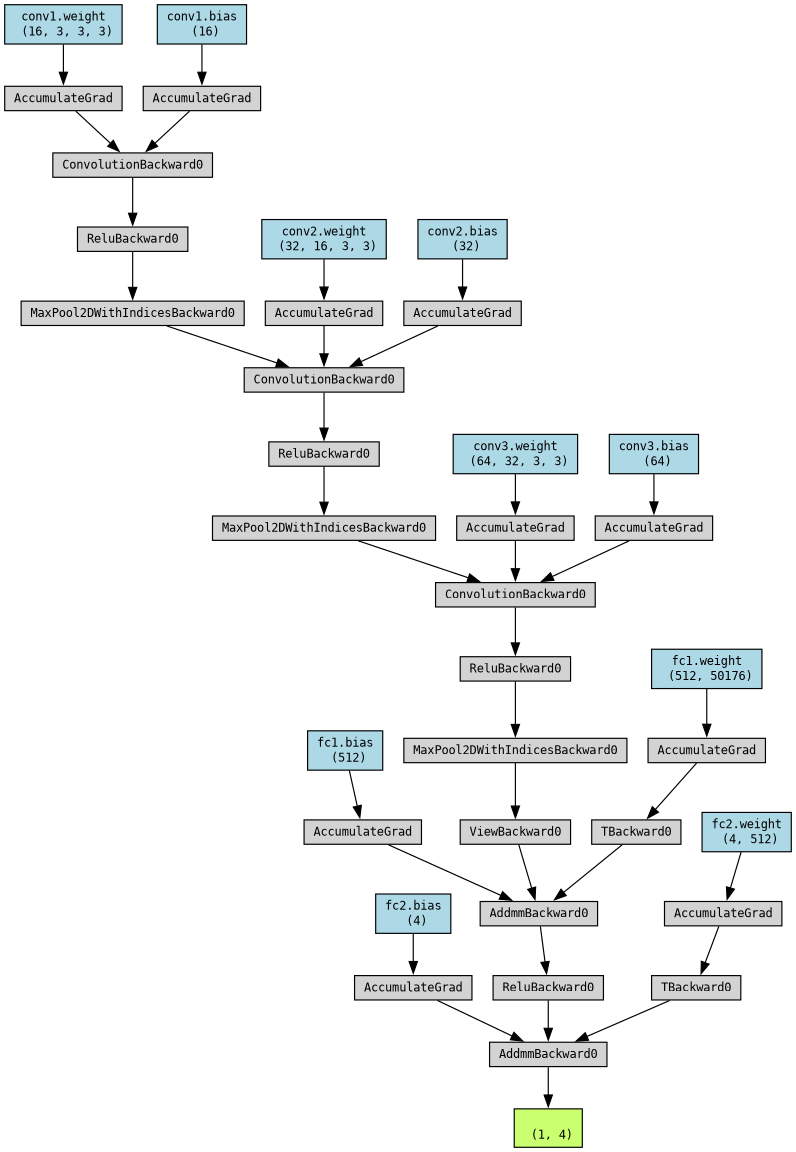

In [15]:
from torchviz import make_dot
from IPython.display import Image

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 4)  # 4 classes
    
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)  # Flatten
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNModel()
x = torch.randn(1, 3, 224, 224)  # Dummy input
y = model(x)
dot = make_dot(y, params=dict(model.named_parameters()))
dot.format = 'png'
dot.render('cnn_model')
Image('cnn_model.png')

In [16]:
from torchinfo import summary
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 4)  # 4 classes

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)  # Flatten
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNModel()
summary(model, input_size=(1, 3, 224, 224), col_names=["input_size", "output_size", "num_params", "kernel_size", "mult_adds"])


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
CNNModel                                 [1, 3, 224, 224]          [1, 4]                    --                        --                        --
├─Conv2d: 1-1                            [1, 3, 224, 224]          [1, 16, 224, 224]         448                       [3, 3]                    22,478,848
├─MaxPool2d: 1-2                         [1, 16, 224, 224]         [1, 16, 112, 112]         --                        2                         --
├─Conv2d: 1-3                            [1, 16, 112, 112]         [1, 32, 112, 112]         4,640                     [3, 3]                    58,204,160
├─MaxPool2d: 1-4                         [1, 32, 112, 112]         [1, 32, 56, 56]           --                        2                         --
├─Conv2d: 1-5                            [1, 32, 56, 56]           [1, 64, 56, 56]       

# Initialize model, criterion, and optimizer

In [17]:
model = CNNModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Model save location


In [18]:
save_path = '/kaggle/working/trained_model.pth'

# Ensure the directory exists before saving
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Model Training & Performance evaluation

In [19]:
from PIL import Image

In [20]:
def compute_loss_and_accuracy(model, data_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    loss = running_loss / len(data_loader.dataset)
    accuracy = correct / total
    return loss, accuracy

def train_model(model, criterion, optimizer, num_epochs=5, save_path='trained_model.pth'):
    model.train()
    best_accuracy = 0.0

    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        # Training phase
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_dataset)
        epoch_accuracy = correct / total
        
        # Testing phase
        test_loss, test_accuracy = compute_loss_and_accuracy(model, test_loader, criterion)
        
        # Save the model if it has the best accuracy
        if epoch_accuracy > best_accuracy:
            best_accuracy = epoch_accuracy
            torch.save(model.state_dict(), save_path)

        # Append losses and accuracies for plotting
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        # Print results for the epoch
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, "
              f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
    print(f"Training complete. Best accuracy: {best_accuracy:.4f}. Model saved to {save_path}")
    
    return train_losses, train_accuracies, test_losses, test_accuracies

# Train the model
train_losses, train_accuracies, test_losses, test_accuracies = train_model(model, criterion, optimizer, num_epochs=5, save_path=save_path)

Epoch [1/5], Train Loss: 0.6673, Train Accuracy: 0.7316, Test Loss: 0.5078, Test Accuracy: 0.7872
Epoch [2/5], Train Loss: 0.3549, Train Accuracy: 0.8606, Test Loss: 0.4010, Test Accuracy: 0.8352
Epoch [3/5], Train Loss: 0.2449, Train Accuracy: 0.9062, Test Loss: 0.2598, Test Accuracy: 0.8955
Epoch [4/5], Train Loss: 0.1683, Train Accuracy: 0.9394, Test Loss: 0.2265, Test Accuracy: 0.9039
Epoch [5/5], Train Loss: 0.1062, Train Accuracy: 0.9632, Test Loss: 0.1803, Test Accuracy: 0.9397
Training complete. Best accuracy: 0.9632. Model saved to /kaggle/working/trained_model.pth


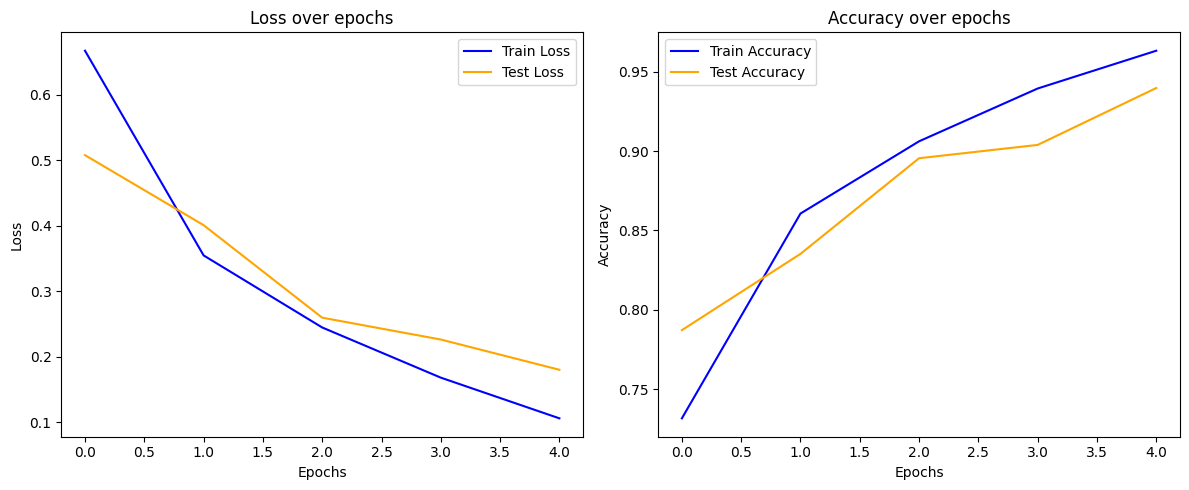

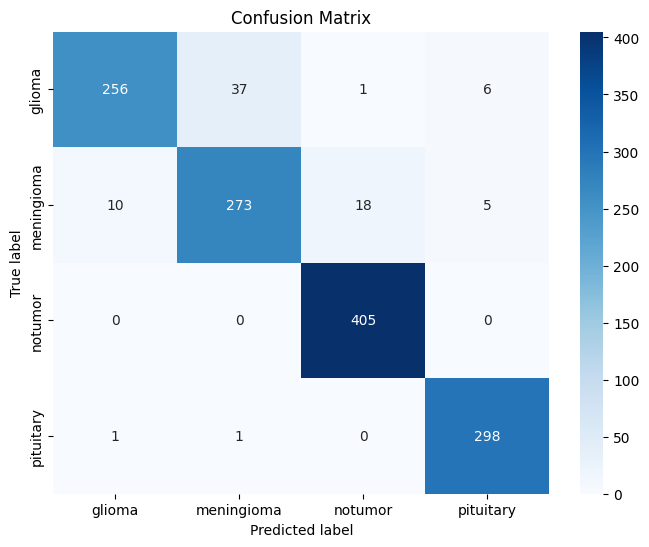

Class: glioma
Precision: 0.9588
Recall: 0.8533
F1 Score: 0.9030

Class: meningioma
Precision: 0.8778
Recall: 0.8922
F1 Score: 0.8849

Class: notumor
Precision: 0.9552
Recall: 1.0000
F1 Score: 0.9771

Class: pituitary
Precision: 0.9644
Recall: 0.9933
F1 Score: 0.9787

Class: macro avg
Precision: 0.9391
Recall: 0.9347
F1 Score: 0.9359

Class: weighted avg
Precision: 0.9401
Recall: 0.9397
F1 Score: 0.9390



In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

def compute_additional_metrics(all_labels, all_predictions):
    # Generate a classification report which includes precision, recall, F1 score for each class
    report = classification_report(all_labels, all_predictions, target_names=train_dataset.classes, output_dict=True)
    return report

def plot_training_testing_graphs(train_losses, train_accuracies, test_losses, test_accuracies, save_path=None):
    # Plotting Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(test_losses, label='Test Loss', color='orange')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(test_accuracies, label='Test Accuracy', color='orange')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    
    # Save the figure if save_path is provided
    if save_path:
        plt.savefig(save_path)
    plt.show()

def generate_confusion_matrix(model, save_path=None):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')

    # Save the confusion matrix if save_path is provided
    if save_path:
        plt.savefig(save_path)
    plt.show()

    return all_labels, all_predictions

# Generate reports and save graphs
plot_training_testing_graphs(train_losses, train_accuracies, test_losses, test_accuracies, save_path='training_testing_graphs.png')

# Generate confusion matrix and compute metrics, saving the confusion matrix
all_labels, all_predictions = generate_confusion_matrix(model, save_path='confusion_matrix.png')
report = compute_additional_metrics(all_labels, all_predictions)

# Print precision, recall, F1 score for each class
for class_name, metrics in report.items():
    if isinstance(metrics, dict):  # Check if it's a class
        print(f"Class: {class_name}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1 Score: {metrics['f1-score']:.4f}")
        print()  # Blank line for readability


# Test the model

In [22]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
import os

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transforms for the testing dataset
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Custom Dataset class for loading brain tumor data
class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
        self.image_paths = []
        self.labels = []
        
        for label, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.image_paths.append(img_path)
                self.labels.append(label)
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Load the model state dictionary
model_path = '/kaggle/working/trained_model.pth'
state_dict = torch.load(model_path, map_location=device)

# Define your model architecture
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 4)  # 4 classes
    
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)  # Flatten
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate your model
model = CNNModel().to(device)

# Load state_dict into your model
model.load_state_dict(state_dict)
model.eval()  # Set the model to evaluation mode

# Create dataset instance for testing
test_dataset = BrainTumorDataset(root_dir='/kaggle/input/brain-tumor-mri-dataset/Testing', transform=test_transform)

# Randomly select 10 images from the test set
num_images = 20
random_indices = np.random.choice(len(test_dataset), num_images, replace=False)

print("Actual Label | Predicted Label")
print("-----------------------------")

# Perform inference on each selected image
for idx in random_indices:
    image, label = test_dataset[idx]
    image = image.unsqueeze(0).to(device)  # Add batch dimension and move to device
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output.data, 1)
    
    actual_label = test_dataset.classes[label]
    predicted_label = test_dataset.classes[predicted.item()]
    
    print(f"{actual_label:12} | {predicted_label:14}")



Actual Label | Predicted Label
-----------------------------
glioma       | glioma        
glioma       | glioma        
glioma       | glioma        
glioma       | glioma        
pituitary    | pituitary     
notumor      | notumor       
glioma       | glioma        
notumor      | notumor       
pituitary    | pituitary     
glioma       | glioma        
meningioma   | meningioma    
notumor      | notumor       
meningioma   | meningioma    
meningioma   | meningioma    
notumor      | notumor       
pituitary    | pituitary     
glioma       | glioma        
notumor      | notumor       
meningioma   | meningioma    
pituitary    | pituitary     


In [23]:
import os
import numpy as np
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from sklearn.model_selection import KFold
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms

# Define your CNN model (replace with your actual model architecture)
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Example architecture; replace with your actual architecture
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 56 * 56, 128)  # Adjust input size based on your image size
        self.fc2 = nn.Linear(128, 4)  # 4 classes: glioma, meningioma, notumor, pituitary

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 56 * 56)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x  # Output logits for the classes

# Custom Dataset Class
class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
        self.image_paths = []
        self.labels = []
        
        for label, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.image_paths.append(img_path)
                self.labels.append(label)
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Set the paths for your datasets
train_data_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'
test_data_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing'
model_save_path = '/kaggle/working/trained_model.pth'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Initialize dataset
train_dataset = BrainTumorDataset(root_dir=train_data_dir, transform=train_transform)

# K-Fold Cross-Validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True)

# Initialize lists to store results
fold_results = []

# Function to train the model
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs, save_path):
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize weights

            running_loss += loss.item()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # Save the trained model
    torch.save(model.state_dict(), save_path)

# Function to test the model
def test_model(model, criterion, val_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Validation Accuracy: {accuracy:.4f}')
    return accuracy

for fold, (train_idx, val_idx) in enumerate(kf.split(np.arange(len(train_dataset)))): 
    print(f"Fold {fold + 1}/{k_folds}")

    # Create data loaders for the current fold
    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)

    train_loader = DataLoader(train_dataset, batch_size=32, sampler=train_sampler)
    val_loader = DataLoader(train_dataset, batch_size=32, sampler=val_sampler)

    # Initialize model, criterion, and optimizer
    model = CNNModel().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=5, save_path=model_save_path)
    
    # After training, evaluate the model and store results
    fold_accuracy = test_model(model, criterion, val_loader)  # This should return accuracy
    fold_results.append(fold_accuracy)

# Average results across folds
average_accuracy = np.mean(fold_results)
print(f"Average accuracy across {k_folds} folds: {average_accuracy:.4f}")


Fold 1/5
Epoch [1/5], Loss: 0.6276
Epoch [2/5], Loss: 0.3161
Epoch [3/5], Loss: 0.2184
Epoch [4/5], Loss: 0.1329
Epoch [5/5], Loss: 0.0985
Validation Accuracy: 0.9283
Fold 2/5
Epoch [1/5], Loss: 0.7838
Epoch [2/5], Loss: 0.4151
Epoch [3/5], Loss: 0.2659
Epoch [4/5], Loss: 0.2066
Epoch [5/5], Loss: 0.1435
Validation Accuracy: 0.9020
Fold 3/5
Epoch [1/5], Loss: 0.7766
Epoch [2/5], Loss: 0.4026
Epoch [3/5], Loss: 0.2767
Epoch [4/5], Loss: 0.1969
Epoch [5/5], Loss: 0.1692
Validation Accuracy: 0.9308
Fold 4/5
Epoch [1/5], Loss: 0.6454
Epoch [2/5], Loss: 0.3674
Epoch [3/5], Loss: 0.2489
Epoch [4/5], Loss: 0.1648
Epoch [5/5], Loss: 0.1031
Validation Accuracy: 0.9054
Fold 5/5
Epoch [1/5], Loss: 0.6004
Epoch [2/5], Loss: 0.3166
Epoch [3/5], Loss: 0.2116
Epoch [4/5], Loss: 0.1345
Epoch [5/5], Loss: 0.0883
Validation Accuracy: 0.9308
Average accuracy across 5 folds: 0.9195


In [24]:
# import os

# # Specify the file path
# file_path = '/kaggle/working/trained_model.pth'

# # Check if the file exists and delete it
# if os.path.exists(file_path):
#     os.remove(file_path)
#     print(f"Deleted the file: {file_path}")
# else:
#     print(f"File not found: {file_path}")


In [25]:
# import os
# import shutil

# # Define the output directory path
# output_dir = '/kaggle/working/'

# # Check if the output directory exists
# if os.path.exists(output_dir):
#     # Iterate over all files and directories in the output directory
#     for filename in os.listdir(output_dir):
#         file_path = os.path.join(output_dir, filename)
#         try:
#             # Remove files or directories
#             if os.path.isfile(file_path) or os.path.islink(file_path):
#                 os.unlink(file_path)  # Remove file or link
#             elif os.path.isdir(file_path):
#                 shutil.rmtree(file_path)  # Remove directory and its contents
#         except Exception as e:
#             print(f'Failed to delete {file_path}. Reason: {e}')
# else:
#     print(f'The directory {output_dir} does not exist.')
